# Brain tumor project

**Project Overview and Objectives**

The main purpose of this project was to build a CNN model that would classify if subject has a tumor or not base on MRI scan. I used the VGG-16 model architecture and weights to train the model for this binary problem. I used accuracy as a metric to justify the model performance which can be defined as:

Accuracy=Number of correclty predicted /imagesTotal number of tested images × 100%

**Data Set Description**

The image data that was used for this problem is Brain MRI Images for Brain Tumor Detection. It conists of MRI scans of two classes:


*   NO - no tumor, encoded as 0
*   YES - tumor, encoded as 1

Unfortunately, the data set description doesn't hold any information where this MRI scans come from and so on.

**What is Brain Tumor?**


A brain tumor occurs when abnormal cells form within the brain. There are two main types of tumors: cancerous (malignant) tumors and benign tumors. Cancerous tumors can be divided into primary tumors, which start within the brain, and secondary tumors, which have spread from elsewhere, known as brain metastasis tumors. All types of brain tumors may produce symptoms that vary depending on the part of the brain involved. These symptoms may include headaches, seizures, problems with vision, vomiting and mental changes. The headache is classically worse in the morning and goes away with vomiting. Other symptoms may include difficulty walking, speaking or with sensations. As the disease progresses, unconsciousness may occur.


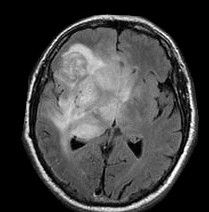


### Importing the libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


import warnings
warnings.filterwarnings('ignore')

In [ ]:
tf.__version__

'2.11.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data_brain_tumor/train_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 253 images belonging to 2 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data_brain_tumor/test_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 253 images belonging to 1 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = (30))

Epoch 1/30


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
8/8 [==============================] - ETA: 0s - loss: 0.6708 - accuracy: 0.6403

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7ff46a81e8b0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7ff46a81e8b0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
8/8 [==============================] - 7s 727ms/step - loss: 0.6708 - accuracy: 0.6403 - val_loss: 1.0395 - val_accuracy: 0.2530
Epoch 2/30
8/8 [==============================] - 5s 681ms/step - loss: 0.5238 - accuracy: 0.7747 - val_loss: 1.8491 - val_accuracy: 0.2648
Epoch 3/30
8/8 [==============================] - 5s 679ms/step - loss: 0.5763 - accuracy: 0.7233 - val_loss: 1.0862 - val_accuracy: 0.4269
Epoch 4/30
8/8 [=====================

## Part 4 - Making a single prediction

In [ ]:
import numpy as np
#from keras.preprocessing import image
import keras.utils as image

In [ ]:
test_image = image.load_img('/content/drive/MyDrive/data_brain_tumor/tumor_yes.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'This brain have a tumor'
else:
  prediction = 'This brain do NOT have a tumor'

1/1 [==============================] - 0s 30ms/step


In [ ]:
print(prediction)

This brain have a tumor
